In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [4]:
main_df = pd.read_csv("/content/drive/MyDrive/Trained_Model/purchase2.csv")
sub = pd.read_csv("/content/drive/MyDrive/Trained_Model/sample submission 1.csv")

In [38]:
main_df

,PURCHASE_DATE,MAGIC_KEY,BOX_ID,BOX_COUNT,MONTH,DATE,YEAR,oct,nov,dec,jan,feb
0,2019-02-01,2CED678A247,12.0,1.0,2,1,2019,0,0,0,0,1
1,2019-02-01,2BF58D91BA1,12.0,1.0,2,1,2019,0,0,0,0,1
2,2019-02-01,2C15B86534E,99.0,1.0,2,1,2019,0,0,0,0,1
3,2019-02-01,2C32D9A859A,6.0,1.0,2,1,2019,0,0,0,0,1
4,2019-02-01,2C7A55404D1,4.0,1.0,2,1,2019,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1240383,2018-10-14,2C60F8DFD12,106.0,1.0,10,14,2018,1,0,0,0,0
1240384,2018-10-14,2C2951E4931,134.0,1.0,10,14,2018,1,0,0,0,0
1240385,2018-10-14,2A0970C954B,231.0,1.0,10,14,2018,1,0,0,0,0
1240386,2018-10-14,2CDBF128CAC,89.0,1.0,10,14,2018,1,0,0,0,0


In [7]:
main_df[["oct","nov","dec","jan","feb"]]

,oct,nov,dec,jan,feb
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
1240383,1,0,0,0,0
1240384,1,0,0,0,0
1240385,1,0,0,0,0
1240386,1,0,0,0,0


In [ ]:

data = main_df[["oct","nov","dec","jan","feb"]]


## LSTM

In [20]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout


X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

X = X.astype(float)
y = y.astype(float)


X = X.reshape(X.shape[0], 1, X.shape[1])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = Sequential()
model.add(LSTM(units=50, return_sequences=True,  input_shape=(1, X.shape[2])))
model.add(Dropout(0.2))  # Add dropout with a dropout rate of 20%
model.add(LSTM(units=50))
model.add(Dense(units=1))


model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))



Epoch 1/5
31010/31010 [==============================] - 158s 5ms/step - loss: 6.2692e-04 - accuracy: 0.9994 - val_loss: 8.6726e-07 - val_accuracy: 1.0000
Epoch 2/5
31010/31010 [==============================] - 148s 5ms/step - loss: 4.5447e-06 - accuracy: 1.0000 - val_loss: 3.4353e-07 - val_accuracy: 1.0000
Epoch 3/5
31010/31010 [==============================] - 150s 5ms/step - loss: 5.9133e-07 - accuracy: 1.0000 - val_loss: 7.1762e-08 - val_accuracy: 1.0000
Epoch 4/5
31010/31010 [==============================] - 147s 5ms/step - loss: 2.6823e-07 - accuracy: 1.0000 - val_loss: 1.5426e-07 - val_accuracy: 1.0000
Epoch 5/5
31010/31010 [==============================] - 155s 5ms/step - loss: 2.1981e-07 - accuracy: 1.0000 - val_loss: 5.5105e-08 - val_accuracy: 1.0000


In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score



y_pred = model.predict(X_test)

# Convert probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)


# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred)

7753/7753 [==============================] - 15s 2ms/step


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC Score: 1.0


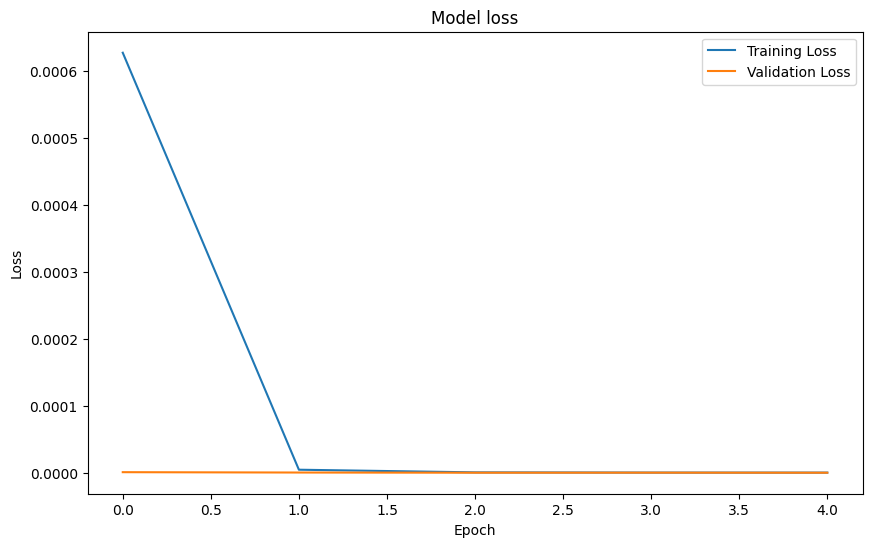

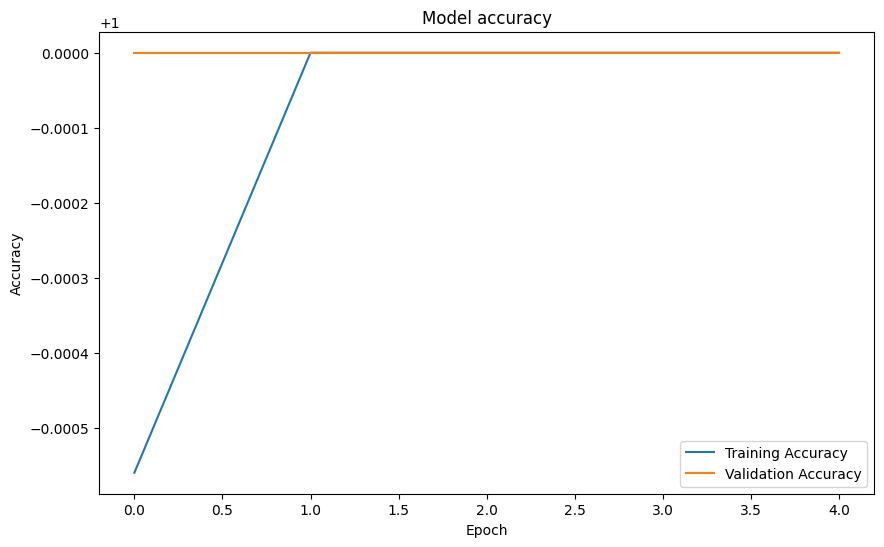

In [24]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)


import matplotlib.pyplot as plt
# Visualize training history
plt.figure(figsize=(10, 6))

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Predict

In [ ]:
import numpy as np
from scipy.stats import mode

for i in range(sub.shape[0]):
  temp = main_df[main_df["MAGIC_KEY"]==sub["MAGIC_KEY"][i]][["nov","dec","jan","feb"]].values
  if len(temp)>0:

    temp = temp.astype(float)
    temp= temp.reshape(temp.shape[0], 1, X.shape[1])
    y_pred = model.predict(temp)
    y_pred_binary = mode((y_pred > 0.5).astype(int))[0][0]

    if y_pred_binary == 1:
      sub["PURCHASE"][i] = 'Y'
    else:
      sub["PURCHASE"][i] ="N"


  else:
    sub["PURCHASE"][i] ="N"

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 30ms/step


In [ ]:
sub

## Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

# Split features and target
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC Score: 1.0


In [ ]:
import numpy as np
from scipy.stats import mode
from tqdm.notebook import tqdm


sub2 = pd.read_csv("/content/drive/MyDrive/Trained_Model/sample submission 1.csv")

for i in tqdm(range(sub.shape[0])):
  temp = main_df[main_df["MAGIC_KEY"]==sub2["MAGIC_KEY"][i]][["nov","dec","jan","feb"]].values
  if len(temp)>0:

    y_pred = np.argmax(rf_classifier.predict(temp))

    if y_pred == 1:
      sub2["PURCHASE"][i] = 'Y'
    else:
      sub2["PURCHASE"][i] ="N"


  else:
    sub2["PURCHASE"][i] ="N"

In [ ]:
sub2

##RandomForestRegressor

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split



X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 0.0
Mean Absolute Error: 0.0


In [ ]:
import numpy as np
from scipy.stats import mode
from tqdm.notebook import tqdm


sub3 = pd.read_csv("/content/drive/MyDrive/Trained_Model/sample submission 1.csv")

for i in tqdm(range(sub.shape[0])):
  temp = main_df[main_df["MAGIC_KEY"]==sub3["MAGIC_KEY"][i]][["nov","dec","jan","feb"]].values
  if len(temp)>0:

    y_pred = np.argmax(rf_regressor.predict(temp))

    if y_pred == 1:
      sub3["PURCHASE"][i] = 'Y'
    else:
      sub3["PURCHASE"][i] ="N"


  else:
    sub3["PURCHASE"][i] ="N"

In [ ]:
sub3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [ ]:
import os

# Navigate to a directory in your Google Drive
os.chdir('/content/drive/My Drive/dataset')

# List files in the current directory
files = os.listdir()
print(files)


['problem1.csv', 'boxes.csv', 'purchase.csv', 'sample submission 1.csv', 'submission.csv', 'problem 2.csv']


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Read the purchase data
purchase_data = pd.read_csv("purchase.csv", dtype={'BOX_COUNT': 'float64', 'BOX_ID': 'float64'},
                            parse_dates=['PURCHASE_DATE'], date_parser=lambda x: pd.to_datetime(x, format="%d/%m/%Y"))

<ipython-input-16-933cab3e4501>:5: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  purchase_data = pd.read_csv("purchase.csv", dtype={'BOX_COUNT': 'float64', 'BOX_ID': 'float64'},


In [ ]:
purchase_data

,PURCHASE_DATE,MAGIC_KEY,BOX_ID,BOX_COUNT
0,2019-02-01,2CED678A247,12.0,1.0
1,2019-02-01,2BF58D91BA1,12.0,1.0
2,2019-02-01,2C15B86534E,99.0,1.0
3,2019-02-01,2C32D9A859A,6.0,1.0
4,2019-02-01,2C7A55404D1,4.0,1.0
...,...,...,...,...
2455859,2018-10-28,2BD992B5538,12.0,1.0
2455860,2018-10-28,2C97CD72233,17.0,1.0
2455861,2018-10-28,2C91C61D372,40.0,1.0
2455862,2018-10-28,2CD70CFC4E3,51.0,1.0


In [ ]:

pur = pd.read_csv("purchase.csv", dtype={'BOX_COUNT': 'float64', 'BOX_ID': 'float64'},
                            parse_dates=['PURCHASE_DATE'], date_parser=lambda x: pd.to_datetime(x, format="%d/%m/%Y"))


<ipython-input-18-d03ae0026a50>:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  pur = pd.read_csv("purchase.csv", dtype={'BOX_COUNT': 'float64', 'BOX_ID': 'float64'},


In [ ]:
mag_key = []
pur = pd.read_csv('/kaggle/input/robi-datathon-30-qualifier-problem-1/purchase.csv')


In [ ]:
uni_magic = list(set(pur['MAGIC_KEY']))
for i in uni_magic:
    Oct.append(len(pur[(pur['PURCHASE_DATE'] <= '2018-10-15') & (pur['MAGIC_KEY']==i)]))
    Nov.append(len(pur[(pur['PURCHASE_DATE'] <= '2018-11-15') & (pur['MAGIC_KEY']==i)]))
    Dec.append(len(pur[(pur['PURCHASE_DATE'] <= '2018-12-15') & (pur['MAGIC_KEY']==i)]))
    Jan.append(len(pur[(pur['PURCHASE_DATE'] <= '2019-01-15') & (pur['MAGIC_KEY']==i)]))
    Feb.append(len(pur[(pur['PURCHASE_DATE'] <= '2019-02-15') & (pur['MAGIC_KEY']==i)]))
    mag_key.append(i)


In [ ]:
new_df = pd.DataFrame({
    "mag_key":mag_key,
    "Oct":Oct,
    "Nov":Nov,
    "Dec":Dec,
    "Jan":Jan,
    "Feb":Feb,
})
new_df

In [ ]:
new_df.to_csv('purchases_by_month.csv', index=False)

In [ ]:
box_id_counts = purchase_data['BOX_ID'].value_counts()
print("Count of occurrences of each unique BOX_ID:")
print(box_id_counts)


Count of occurrences of each unique BOX_ID:
BOX_ID
163.0    226548
143.0    189194
162.0    169705
258.0    116822
255.0    100048
          ...  
93.0          1
19.0          1
1.0           1
229.0         1
109.0         1
Name: count, Length: 291, dtype: int64


In [ ]:
# Check if there are any null values in the 'BOX_ID' column
null_values = purchase_data['BOX_ID'].isnull().sum()



In [ ]:
null_values = purchase_data['MAGIC_KEY'].isnull().sum()

In [ ]:
null_values

0

In [ ]:
magic_key_count = purchase_data['MAGIC_KEY'].nunique()
print("Number of unique MAGIC_KEYs:", magic_key_count)


Number of unique MAGIC_KEYs: 1274108


In [ ]:
# Count the number of values in the 'BOX_ID' column greater than 290
# Count the number of values in the 'BOX_ID' column greater than 290
count_greater_than_290 = (purchase_data['BOX_ID'] > 290).sum()
count_greater_than_290



17

In [ ]:
# Extract month and day from PURCHASE_DATE
purchase_data['PURCHASE_MONTH'] = purchase_data['PURCHASE_DATE'].dt.month
purchase_data['PURCHASE_DAY'] = purchase_data['PURCHASE_DATE'].dt.day

# Define a function to check if a purchase was made during the first 15 days of a month
def check_purchase_first_15_days(group):
    return 'Y' if any(group['PURCHASE_DAY'] <= 15) else 'N'

# Group the data by MAGIC_KEY and month, then apply the function
first_15_days_purchase = purchase_data.groupby(['MAGIC_KEY', 'PURCHASE_MONTH']).apply(check_purchase_first_15_days)

# Reset index to make the groupby results a DataFrame
first_15_days_purchase = first_15_days_purchase.reset_index()

# Rename the column to indicate whether a purchase was made in the first 15 days
first_15_days_purchase.rename(columns={0: 'PURCHASE_FIRST_15_DAYS'}, inplace=True)

# Merge the result back to the original dataframe
purchase_data = purchase_data.merge(first_15_days_purchase, on=['MAGIC_KEY', 'PURCHASE_MONTH'], how='left')

# Fill missing values with 'N' (indicating no purchase in the first 15 days)
purchase_data['PURCHASE_FIRST_15_DAYS'].fillna('N', inplace=True)

# Drop the temporary PURCHASE_MONTH and PURCHASE_DAY columns
purchase_data.drop(['PURCHASE_MONTH', 'PURCHASE_DAY'], axis=1, inplace=True)

# Display the updated dataframe
print(purchase_data.head())


  PURCHASE_DATE    MAGIC_KEY  BOX_ID  BOX_COUNT PURCHASE_FIRST_15_DAYS
0    2019-02-01  2CED678A247    12.0        1.0                      Y
1    2019-02-01  2BF58D91BA1    12.0        1.0                      Y
2    2019-02-01  2C15B86534E    99.0        1.0                      Y
3    2019-02-01  2C32D9A859A     6.0        1.0                      Y
4    2019-02-01  2C7A55404D1     4.0        1.0                      Y


In [ ]:
purchase_data['PURCHASE_FIRST_15_DAYS'].value_counts()

PURCHASE_FIRST_15_DAYS
Y    1366112
N    1089752
Name: count, dtype: int64

In [ ]:
# Initialize the LabelEncoder
encoder = LabelEncoder()

# Encode the MAGIC_KEY column
purchase_data['MAGIC_KEY_encoded'] = encoder.fit_transform(purchase_data['MAGIC_KEY'])

# Print a sample of the encoded data
print(purchase_data[['MAGIC_KEY', 'MAGIC_KEY_encoded']].head())


     MAGIC_KEY  MAGIC_KEY_encoded
0  2CED678A247            1222234
1  2BF58D91BA1             526391
2  2C15B86534E             624102
3  2C32D9A859A             708928
4  2C7A55404D1             870797


     MAGIC_KEY  MAGIC_KEY_encoded
0  2CED678A247            1222234
1  2BF58D91BA1             526391
2  2C15B86534E             624102
3  2C32D9A859A             708928
4  2C7A55404D1             870797


In [ ]:
purchase_data

,PURCHASE_DATE,MAGIC_KEY,BOX_ID,BOX_COUNT,PURCHASE_FIRST_15_DAYS,MAGIC_KEY_encoded
0,2019-02-01,2CED678A247,12.0,1.0,Y,1222234
1,2019-02-01,2BF58D91BA1,12.0,1.0,Y,526391
2,2019-02-01,2C15B86534E,99.0,1.0,Y,624102
3,2019-02-01,2C32D9A859A,6.0,1.0,Y,708928
4,2019-02-01,2C7A55404D1,4.0,1.0,Y,870797
...,...,...,...,...,...,...
2455859,2018-10-28,2BD992B5538,12.0,1.0,N,425064
2455860,2018-10-28,2C97CD72233,17.0,1.0,N,950422
2455861,2018-10-28,2C91C61D372,40.0,1.0,N,933236
2455862,2018-10-28,2CD70CFC4E3,51.0,1.0,N,1145776


In [ ]:
problem_data = pd.read_csv("problem1.csv")

In [ ]:
# Use the existing LabelEncoder instance to transform the MAGIC_KEY column in problem_data
problem_data['MAGIC_KEY_encoded'] = encoder.transform(problem_data['MAGIC_KEY'])

# Print a sample of the encoded problem_data
print(problem_data[['MAGIC_KEY', 'MAGIC_KEY_encoded']].head())


     MAGIC_KEY  MAGIC_KEY_encoded
0  28D5BB06356              17077
1  293BEAB4E98             243997
2  2962EE8065C             267597
3  2957BE29EA9             260161
4  28E351A0745              57886


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
purchase_data['PURCHASE_FIRST_15_DAYS_encoded'] = label_encoder.fit_transform(purchase_data['PURCHASE_FIRST_15_DAYS'])

In [ ]:
purchase_data

In [ ]:
problem_data

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Using 'MAGIC_KEY_encoded' as features and 'PURCHASE_FIRST_15_DAYS' as target
X_train = purchase_data[['MAGIC_KEY_encoded']]
y_train = purchase_data['PURCHASE_FIRST_15_DAYS_encoded']

# Split data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train the logistic regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predictions on the validation set
valid_preds = clf.predict(X_valid)

# Calculate accuracy on the validation set
accuracy = accuracy_score(y_valid, valid_preds)
print("Validation Accuracy:", accuracy)


Validation Accuracy: 0.5563721947256873


In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting  # Enable HistGradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Using 'MAGIC_KEY_encoded' as features and 'PURCHASE_FIRST_15_DAYS_encoded' as target
X_train = purchase_data[['MAGIC_KEY_encoded']]
y_train = purchase_data['PURCHASE_FIRST_15_DAYS']

# Split data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train the Histogram-based Gradient Boosting model
clf = HistGradientBoostingClassifier()
clf.fit(X_train, y_train)

# Predictions on the validation set
valid_preds = clf.predict(X_valid)

# Calculate accuracy on the validation set
accuracy = accuracy_score(y_valid, valid_preds)
print("Validation Accuracy:", accuracy)


Validation Accuracy: 0.5565208185303345


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Using 'MAGIC_KEY_encoded' as features and 'PURCHASE_FIRST_15_DAYS' as target
X_train = purchase_data[['MAGIC_KEY_encoded']]
y_train = purchase_data['PURCHASE_FIRST_15_DAYS']

# Split data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Create a Gradient Boosting classifier
clf = GradientBoostingClassifier()

# Train the model
clf.fit(X_train, y_train)

# Predictions on the validation set
valid_preds = clf.predict(X_valid)

# Calculate accuracy on the validation set
accuracy = accuracy_score(y_valid, valid_preds)
print("Validation Accuracy:", accuracy)


Validation Accuracy: 0.5571417810018059


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest classifier
clf = RandomForestClassifier()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train a new classifier with the best hyperparameters
best_clf = RandomForestClassifier(**best_params)
best_clf.fit(X_train, y_train)

# Predictions on the validation set
valid_preds = best_clf.predict(X_valid)

# Calculate accuracy on the validation set
accuracy = accuracy_score(y_valid, valid_preds)
print("Validation Accuracy:", accuracy)


KeyboardInterrupt: 

In [ ]:
X_train = purchase_data[['MAGIC_KEY_encoded']]
y_train = purchase_data['PURCHASE_FIRST_15_DAYS']

# Split data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# Train the model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predictions on the validation set
valid_preds = clf.predict(X_valid)

# Calculate accuracy on the validation set
accuracy = accuracy_score(y_valid, valid_preds)
print("Validation Accuracy:", accuracy)



Validation Accuracy: 0.6222053314512188


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Using 'MAGIC_KEY_encoded' as features and 'PURCHASE_FIRST_15_DAYS' as target
X_train = purchase_data[['MAGIC_KEY_encoded']]
y_train = purchase_data['PURCHASE_FIRST_15_DAYS']

# Split data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# Train the SVM model
clf = SVC(kernel='linear')  # You can choose different kernels like 'linear', 'poly', 'rbf', etc.
clf.fit(X_train, y_train)

# Predictions on the validation set
valid_preds = clf.predict(X_valid)

# Calculate accuracy on the validation set
accuracy = accuracy_score(y_valid, valid_preds)
print("Validation Accuracy:", accuracy)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Using 'MAGIC_KEY_encoded' as features and 'PURCHASE_FIRST_15_DAYS' as target
X_train = purchase_data[['MAGIC_KEY_encoded']]
y_train = purchase_data['PURCHASE_FIRST_15_DAYS']

# Split data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# Train the KNN model
clf = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors (k)
clf.fit(X_train, y_train)

# Predictions on the validation set
valid_preds = clf.predict(X_valid)

# Calculate accuracy on the validation set
accuracy = accuracy_score(y_valid, valid_preds)
print("Validation Accuracy:", accuracy)


In [ ]:
# Read problem1.csv


# Predict purchases for problem1.csv data
problem_predictions = clf.predict(problem_data[['MAGIC_KEY_encoded']])

# Create submission DataFrame
submission_df = pd.DataFrame({'MAGIC_KEY': problem_data['MAGIC_KEY_encoded'], 'PURCHASE': problem_predictions})

In [ ]:
problem_data['MAGIC_KEY_decoded'] = encoder.inverse_transform(problem_data['MAGIC_KEY_encoded'])

# Create submission DataFrame
submission_df = pd.DataFrame({'MAGIC_KEY': problem_data['MAGIC_KEY_decoded'], 'PURCHASE': problem_predictions})

# Write predictions to submission.csv
submission_df.to_csv('submission.csv', index=False)

In [ ]:
submission_df.to_csv('submission.csv', index=False)